In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt                        
import pandas as pd
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score, average_precision_score, precision_recall_curve, confusion_matrix


In [3]:
#load the dataset
datafile=pd.ExcelFile(r'/content/drive/MyDrive/Asssignment4_Data.xlsx') 
Train=pd.read_excel(datafile,'Train') 
Test=pd.read_excel(datafile,'Test')

In [12]:
#Since excluding House ID i.e. first column, the next 8 columns are features, and last column in target,
X_train=Train.iloc[:,1:9]
Y_train=Train.iloc[:,-1]
X_test=Test.iloc[:,1:9]
Y_test=Test.iloc[:,-1]


In [5]:
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict)
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict)
    print("precision: %.2f%%" % (prc * 100.0)) 
    aupr = average_precision_score(y_test, y_predict)
    print("AUPR: %.2f%%" % (aupr * 100.0))
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    specificity = tn / (tn+fp)
    print("Specificity: %.2f%%" % (specificity * 100.0))
    
#evaluate_results(y_test, y_predict)

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier(random_state=1234)
dtmodel.fit(X_train, Y_train) 

DecisionTreeClassifier(random_state=1234)

#Checking accuracy on training set

In [16]:
y_pred = dtmodel.predict(X_train)
accuracy_score(Y_train, y_pred)*100

100.0

#Checking accuracy on testing set

In [17]:
y_pred = dtmodel.predict(X_test)
accuracy_score(Y_test, y_pred)*100


40.0

So, accuracy on training set is 100%, and on testing set is 40%.

accuracy for depth  1
40.0
accuracy for depth  2
80.0
accuracy for depth  3
60.0
accuracy for depth  4
60.0
accuracy for depth  5
40.0
accuracy for depth  6
40.0
accuracy for depth  7
40.0
accuracy for depth  8
40.0
accuracy for depth  9
40.0
accuracy for depth  10
40.0


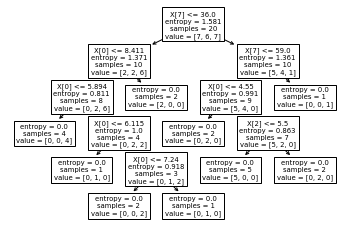

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

for i in range(1,11):
    dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=1234)
    dtmodel.fit(X_train, Y_train)
    y_pred = dtmodel.predict(X_test)
    tree.plot_tree(dtmodel)
    print('accuracy for depth ',i)
    print(accuracy_score(Y_test, y_pred)*100) 

So, on test data, depth=2 gives best accuracy for default decision tree classifier

Ans to 2.3: The reason behind this phenomenon is the first default model was overfitted or too complex model which captured even the noises in training set and thus performed poor on testing set. When we reduce the depth, the complexity was reduced and the model performed better on test i.e. unseen data.

In [20]:
#Building model with max_depth=2 since it gave the best result
bestmodel = DecisionTreeClassifier(max_depth=2, random_state=1234)
bestmodel.fit(X_train, Y_train) 

DecisionTreeClassifier(max_depth=2, random_state=1234)

In [21]:
#Confirming testing accuracy is 60% as we saw in earlier steps
y_pred = bestmodel.predict(X_test)
accuracy_score(Y_test, y_pred)*100


60.0

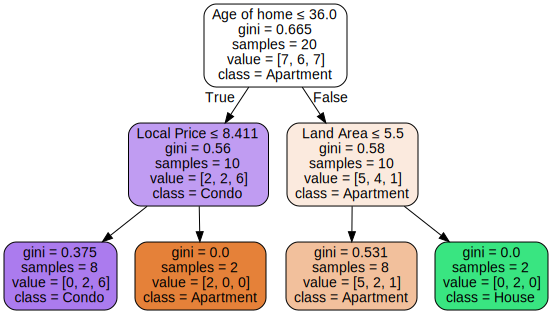

In [22]:
#Plotting tree for depth=2
from sklearn import tree
import graphviz

feature_names=['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
target=['Apartment', 'House', 'Condo']

dot_data = tree.export_graphviz(bestmodel,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data)

graph

Since the age of home is given 23, we should look at local price according to the above decision tree. However, mentioned local price is more than 8.411 and thus condition does not match. Therefore, the predicted class for the given dataset is "Apartment". 